# 不動産取引価格情報APIからデータを取得

In [9]:
!pip install requests
!pip3 install matplotlib

In [10]:
import json
import csv
import requests
import pandas as pd
 
#url = "https://www.land.mlit.go.jp/webland/api/TradeListSearch?from=20151&to=20202&city=13102"
url = "https://www.land.mlit.go.jp/webland/api/TradeListSearch?from=20192&to=20202&area=13"

response = requests.get(url)
jsonData = response.json()
 
#Get keys
keys=[]
data_num = len(jsonData["data"])
 
for i in range(data_num):
    keys.extend(list(jsonData["data"][i].keys()))
keys = set(keys)
 
#Get data
output=[keys]
for i in range(data_num):
    temp=[]
    for key in keys:
        try:
            temp.append(jsonData["data"][i][key])
        except:
            temp.append("NaN")
    output.append(temp)

In [11]:
#Export CSV file
with open("output1.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(output)

# データを見やすいように整形

In [12]:
import os
import pandas as pd
import csv

df = pd.read_csv("output1.csv")
df = pd.DataFrame(df)
df

df1 = df.dropna(subset=["FloorPlan"])
df1 = df1.loc[:, ["Municipality",'TradePrice','FloorPlan','Period',]]
df2 = df1[(df1['Municipality'] == "千代田区")]

df2['Period'] = df2['Period'].str.replace('四半期', '')
df2["Period"] = df2["Period"].str.replace('年第', '')
df2["Period"] = df2["Period"].str.replace('１', '1').str.replace('２', '2').str.replace('３', '3').str.replace('４', '4')
df2

/var/folders/hk/twbvbm8j0pzdtg49fgk6bz8r0000gn/T/ipykernel_58957/3885492332.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Period'] = df2['Period'].str.replace('四半期', '')
/var/folders/hk/twbvbm8j0pzdtg49fgk6bz8r0000gn/T/ipykernel_58957/3885492332.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Period"] = df2["Period"].str.replace('年第', '')
/var/folders/hk/twbvbm8j0pzdtg49fgk6bz8r0000gn/T/ipykernel_58957/3885492332.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

Municipality  TradePrice FloorPlan Period
2           千代田区    65000000      ３ＬＤＫ  20201
3           千代田区    40000000      １ＬＤＫ  20193
4           千代田区   130000000      ３ＬＤＫ  20193
5           千代田区    36000000      １ＬＤＫ  20193
8           千代田区   100000000      ２ＬＤＫ  20192
..           ...         ...       ...    ...
388         千代田区   100000000      ２ＬＤＫ  20201
389         千代田区   190000000      ３ＬＤＫ  20194
390         千代田区    95000000       １ＤＫ  20202
392         千代田区    85000000      １ＬＤＫ  20194
393         千代田区   240000000      ４ＬＤＫ  20193

[284 rows x 4 columns]

# 「FloorPlan」と「TradePrice」の情報を散布図としてグラフ化

Duplicate key in file PosixPath('/Users/ikedakazuto/opt/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/matplotlibrc'), line 257 ('font.family:  IPAexGothic')
findfont: Font family ['MS Gothic'] not found. Falling back to DejaVu Sans.


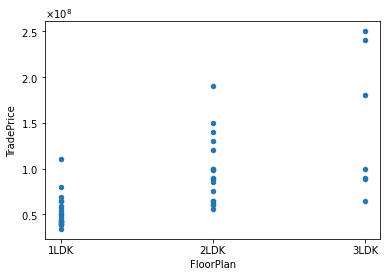

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
from matplotlib.ticker import ScalarFormatter
plt.rcParams["font.family"] = "MS Gothic"

period = (df2.Period == "20202") | (df2.Period == "20201")
df3 = df2.loc[period]

df3 = df3.sort_values('FloorPlan')

df3['FloorPlan'] = df3['FloorPlan'].str.replace('１ＬＤＫ', '1LDK').str.replace('２ＬＤＫ', '2LDK').str.replace('３ＬＤＫ', '3LDK')#全角のままだとグラフが文字化けする

floorplan = (df3.FloorPlan == "1LDK") | (df3.FloorPlan == "2LDK") | (df3.FloorPlan == "3LDK")
df3 = df3.loc[floorplan]


ax =df3.plot.scatter(x='FloorPlan', y='TradePrice')
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

# LIFULL HOMESからスクレイピングで情報を取得

In [14]:
!pip3 install beautifulsoup4

In [15]:
from bs4 import BeautifulSoup
import requests

url = 'https://toushi.homes.co.jp/bukkensearch/tbg[]=2/'

res = requests.get(url)
res.text

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"\n   "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="ja" lang="ja">\n<head>\n  <meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />\n<meta http-equiv="Content-Style-Type" content="text/css" />\n<meta http-equiv="Content-Script-Type" content="text/javascript" />\n<meta name="robots" content="noarchive" />\n\n<title>【ホームズ】一棟マンションを購入する - 収益物件を利回りや価格等で絞り込み ｜ 不動産投資物件[一棟売りマンション・中古一棟マンション]で資産運用</title>\n\n<meta name="description" content="一棟売りマンション一覧 - 収益物件検索｜不動産投資の専門サイト【LIFULL HOME‘S 不動産投資】マンション投資に最適な一棟売りマンションを検索して、価格や想定利回りで比較。資産運用をマンション投資でサポート" />\n<script type="text/javascript" language="javascript" src="/js/library/jquery/jquery-1.8.3.min.js"></script>\n<script type="text/javascript" language="javascript" src="/js/library/jquery/jquery.cookie.js"></script>\n<script type="text/javascript" language="javascript" src="/js/library/jquery/jquery.slides.min.js"></s

In [16]:
soup = BeautifulSoup(res.text, 'html.parser')
soup

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"
   "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">

<html lang="ja" xml:lang="ja" xmlns="http://www.w3.org/1999/xhtml">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="text/css" http-equiv="Content-Style-Type"/>
<meta content="text/javascript" http-equiv="Content-Script-Type"/>
<meta content="noarchive" name="robots"/>
<title>【ホームズ】一棟マンションを購入する - 収益物件を利回りや価格等で絞り込み ｜ 不動産投資物件[一棟売りマンション・中古一棟マンション]で資産運用</title>
<meta content="一棟売りマンション一覧 - 収益物件検索｜不動産投資の専門サイト【LIFULL HOME‘S 不動産投資】マンション投資に最適な一棟売りマンションを検索して、価格や想定利回りで比較。資産運用をマンション投資でサポート" name="description"/>
<script language="javascript" src="/js/library/jquery/jquery-1.8.3.min.js" type="text/javascript"></script>
<script language="javascript" src="/js/library/jquery/jquery.cookie.js" type="text/javascript"></script>
<script language="javascript" src="/js/library/jquery/jquery.slides.min.js" type="text/javascript"></script>
<script language

In [17]:
item_list = soup.find('div', {'class': 'prArea'})
item_list

<div class="prArea">
<div class="prBknList" id="prBknList0">
<div class="prBox">PR</div>
<div class="bknListDetail">
<div class="listDetailTitleArea">
<p class="listDetailTitle">
<span class="u-icon-propertyType_mansion">一棟マンション</span>
<a href="/bukkendetail/index/300720005089/?detailFrom=bmb">池袋マンション　　担当／石田</a>
<input id="hid_pr_detail_url0" type="hidden" value="/bukkendetail/index/300720005089/?detailFrom=bmb"/>
</p>
<p class="shopName">協栄建設株式会社</p>
</div><!-- /listDetailTitleArea -->
<div class="bknStatusWrapper">
<div class="bknImageArea">
<a href="/bukkendetail/index/300720005089/?detailFrom=bmb"><img alt="外観" src="https://image.homes.co.jp/smallimg/image.php?file=http%3A%2F%2Fimg.homes.jp%2Fvsr92rgvvclyj1h.jpg&amp;width=123&amp;height=80"/></a> <a href="/bukkendetail/index/300720005089/?detailFrom=bmb"><img alt="間取り" src="https://image.homes.co.jp/smallimg/image.php?file=http%3A%2F%2Fimg.homes.jp%2Ft16r2rgvvclyj1i.jpg&amp;width=123&amp;height=80"/></a> </div>
<table>
<tr>
<th cla

In [18]:
items = item_list.find_all('div', class_='prBknList')
item = items[0]
item

<div class="prBknList" id="prBknList0">
<div class="prBox">PR</div>
<div class="bknListDetail">
<div class="listDetailTitleArea">
<p class="listDetailTitle">
<span class="u-icon-propertyType_mansion">一棟マンション</span>
<a href="/bukkendetail/index/300720005089/?detailFrom=bmb">池袋マンション　　担当／石田</a>
<input id="hid_pr_detail_url0" type="hidden" value="/bukkendetail/index/300720005089/?detailFrom=bmb"/>
</p>
<p class="shopName">協栄建設株式会社</p>
</div><!-- /listDetailTitleArea -->
<div class="bknStatusWrapper">
<div class="bknImageArea">
<a href="/bukkendetail/index/300720005089/?detailFrom=bmb"><img alt="外観" src="https://image.homes.co.jp/smallimg/image.php?file=http%3A%2F%2Fimg.homes.jp%2Fvsr92rgvvclyj1h.jpg&amp;width=123&amp;height=80"/></a> <a href="/bukkendetail/index/300720005089/?detailFrom=bmb"><img alt="間取り" src="https://image.homes.co.jp/smallimg/image.php?file=http%3A%2F%2Fimg.homes.jp%2Ft16r2rgvvclyj1i.jpg&amp;width=123&amp;height=80"/></a> </div>
<table>
<tr>
<th class="price">価格</th>
<t

In [19]:
rimawari = item.find('span', {'class': 'perNum'}).text
rimawari

'未定'

In [20]:
#len(item_list.find_all('span', class_='address'))

price = item.find('span', {'class': 'valueNum'}).text
price

'1億1,200万円'

In [21]:
address = item.find('span', {'class': 'address'}).text
address

'東京都豊島区池袋3丁目'

In [22]:
walk = item.find('span', {'class': 'walk'}).text
walk

'東京メトロ有楽町線 要町駅 徒歩10分'

In [23]:
#gaikan = item.find({'img': 'src'})
#gaikan
gaikan = item.find('img')['src']
gaikan

'https://image.homes.co.jp/smallimg/image.php?file=http%3A%2F%2Fimg.homes.jp%2Fvsr92rgvvclyj1h.jpg&width=123&height=80'

In [24]:
walk = item.find('span', {'class': 'walk'}).text
walk

'東京メトロ有楽町線 要町駅 徒歩10分'

# 上で確認した機能を関数化して一括で処理
取得した情報をリスト型で記録

In [25]:
url = 'https://toushi.homes.co.jp/bukkensearch/tbg[]=2/'
res = requests.get(url)
soup = BeautifulSoup(res.text, 'html.parser')
item_list = soup.find('div', {'class': 'prArea'})
items = item_list.find_all('div', class_='prBknList')

bukken_data = []
for item in items:
    data_list = {}
    data_list['address'] = item.find('span', {'class': 'address'}).text
    data_list['walk'] = item.find('span', {'class': 'walk'}).text
    data_list['gaikan'] = item.find('img')['src']
    data_list['price'] = item.find('span', {'class': 'valueNum'}).text
    data_list['rimawari'] = item.find('span', {'class': 'perNum'}).text
    
    bukken_data.append(data_list)

In [26]:
bukken_data

[{'address': '東京都杉並区高円寺南1丁目',
  'walk': '東京メトロ丸ノ内線 東高円寺駅 徒歩3分',
  'gaikan': 'https://image.homes.co.jp/smallimg/image.php?file=http%3A%2F%2Fimg.homes.jp%2F3s9v2rgvvclyhcd.jpg&width=123&height=80',
  'price': '2億2,700万円',
  'rimawari': '6.00％'},
 {'address': '埼玉県川口市前川4丁目25-13',
  'walk': 'JR京浜東北・根岸線 西川口駅 前川四丁目下車 徒歩2分',
  'gaikan': 'https://image.homes.co.jp/smallimg/image.php?file=http%3A%2F%2Fimg.homes.jp%2Fud5a2rhlwikfb36.jpeg&width=123&height=80',
  'price': '1億6,900万円',
  'rimawari': '7.76％'},
 {'address': '大阪府大阪市東淀川区大桐3丁目',
  'walk': 'Osaka Metro今里筋線 瑞光四丁目駅 徒歩8分',
  'gaikan': 'https://image.homes.co.jp/smallimg/image.php?file=http%3A%2F%2Fimg.homes.jp%2Fkrdd2rr4mg5u3a5.jpg&width=123&height=80',
  'price': '4,800万円',
  'rimawari': '7.56％'},
 {'address': '兵庫県神戸市垂水区名谷町',
  'walk': '神戸市西神・山手線 名谷駅 バス8分 神和台口下車 徒歩1分',
  'gaikan': 'https://image.homes.co.jp/smallimg/image.php?file=http%3A%2F%2Fimg.homes.jp%2F31ds2rrl7nyw64x.jpg&width=123&height=80',
  'price': '5,190万円',
  'rimawari': '7.1

In [27]:
#リストをで
df_bukken = pd.DataFrame(bukken_data)
df_bukken

address                            walk  \
0     東京都杉並区高円寺南1丁目            東京メトロ丸ノ内線 東高円寺駅 徒歩3分   
1  埼玉県川口市前川4丁目25-13    JR京浜東北・根岸線 西川口駅 前川四丁目下車 徒歩2分   
2   大阪府大阪市東淀川区大桐3丁目     Osaka Metro今里筋線 瑞光四丁目駅 徒歩8分   
3      兵庫県神戸市垂水区名谷町  神戸市西神・山手線 名谷駅 バス8分 神和台口下車 徒歩1分   

                                              gaikan      price rimawari  
0  https://image.homes.co.jp/smallimg/image.php?f...  2億2,700万円    6.00％  
1  https://image.homes.co.jp/smallimg/image.php?f...  1億6,900万円    7.76％  
2  https://image.homes.co.jp/smallimg/image.php?f...    4,800万円    7.56％  
3  https://image.homes.co.jp/smallimg/image.php?f...    5,190万円    7.19％

In [30]:
df_bukken.to_csv('bukken_data.csv')

In [31]:
df = pd.read_csv('bukken_data.csv', index_col=0)
df

address                            walk  \
0     東京都杉並区高円寺南1丁目            東京メトロ丸ノ内線 東高円寺駅 徒歩3分   
1  埼玉県川口市前川4丁目25-13    JR京浜東北・根岸線 西川口駅 前川四丁目下車 徒歩2分   
2   大阪府大阪市東淀川区大桐3丁目     Osaka Metro今里筋線 瑞光四丁目駅 徒歩8分   
3      兵庫県神戸市垂水区名谷町  神戸市西神・山手線 名谷駅 バス8分 神和台口下車 徒歩1分   

                                              gaikan      price rimawari  
0  https://image.homes.co.jp/smallimg/image.php?f...  2億2,700万円    6.00％  
1  https://image.homes.co.jp/smallimg/image.php?f...  1億6,900万円    7.76％  
2  https://image.homes.co.jp/smallimg/image.php?f...    4,800万円    7.56％  
3  https://image.homes.co.jp/smallimg/image.php?f...    5,190万円    7.19％

In [4]:
#!/usr/bin/env python
# coding:utf-8
from apiclient import discovery
import oauth2client
import httplib2
import argparse
import csv
import sys
from oauth2client import file 

SPREADSHEET_ID = '1uow6KXGYDpfNEklXqKh3NXIfP21GCADelPPIMiBaOoI'
RANGE_NAME = 'A1'
MAJOR_DIMENSION = 'ROWS'

CLIENT_SECRET_FILE = 'client_secret.json'
CREDENTIAL_FILE = "./credential.json"
APPLICATION_NAME = 'CSV Appender'

store = oauth2client.file.Storage(CREDENTIAL_FILE)
credentials = store.get()
if not credentials or credentials.invalid:
    SCOPES = 'https://www.googleapis.com/auth/spreadsheets'
    flow = oauth2client.client.flow_from_clientsecrets(CLIENT_SECRET_FILE, SCOPES)
    flow.user_agent = APPLICATION_NAME
    args = '--auth_host_name localhost --logging_level INFO --noauth_local_webserver'
    flags = argparse.ArgumentParser(parents=[oauth2client.tools.argparser]).parse_args(args.split())
    credentials = oauth2client.tools.run_flow(flow, store, flags)

http = credentials.authorize(httplib2.Http())
discoveryUrl = ('https://sheets.googleapis.com/$discovery/rest?' 'version=v4')
service = discovery.build('sheets', 'v4', http=http, discoveryServiceUrl=discoveryUrl)
resource = service.spreadsheets().values()

parser = argparse.ArgumentParser()
parser.add_argument('infile', nargs='?', type=argparse.FileType('r'),
                    default=sys.stdin)
args = parser.parse_args(sys.argv[1:])

r = csv.reader(args.infile)
# read whole csv data
data = list(r)

body = {
    "range": RANGE_NAME,
    "majorDimension": MAJOR_DIMENSION,
    "values": data
}
resource.append(spreadsheetId=SPREADSHEET_ID, range=RANGE_NAME,
                valueInputOption='USER_ENTERED', body=body).execute()


InvalidClientSecretsError: ('Error opening file', 'client_secret.json', 'No such file or directory', 2)